In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cdt

Detecting 1 CUDA device(s).


In [6]:
X = np.random.uniform(-1.2, 3, 250)
Y = X**2 + np.random.normal(0, 0.7, 250)

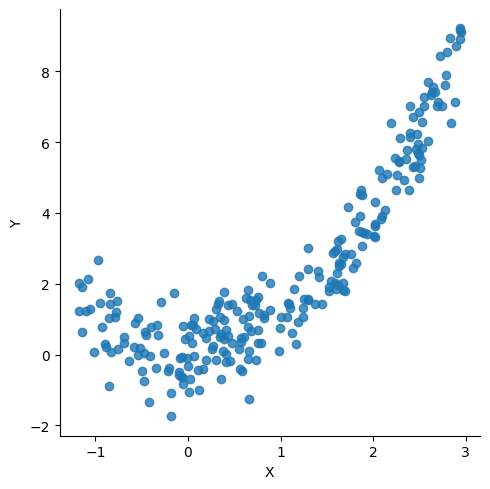

In [7]:
df = pd.DataFrame({'X': X, 'Y': Y})
sns.lmplot(x='X', y='Y', data=df, fit_reg=False, order=2, line_kws={'color': 'red'})

In [8]:
from HSIC import hsic_gam

In [9]:
testStat, thresh = hsic_gam(X.reshape(-1, 1), Y.reshape(-1, 1), alph = 0.05)

In [12]:
print(testStat, thresh)
if testStat > thresh:
    print('X and Y are dependent')

19.08411965976759 0.7215081636054568
X and Y are dependent


In [14]:
from sklearn.svm import SVR
svr_poly_1 = SVR(kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1)
svr_poly_2 = SVR(kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1)

In [16]:
svr_poly_1.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVR(C=100, coef0=1, degree=2, gamma='auto', kernel='poly')

In [17]:
svr_poly_2.fit(Y.reshape(-1, 1), X.reshape(-1, 1))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVR(C=100, coef0=1, degree=2, gamma='auto', kernel='poly')

In [18]:
residuals1 = Y - svr_poly_1.predict(X.reshape(-1, 1))

In [20]:
residuals2 = X - svr_poly_2.predict(Y.reshape(-1, 1))

Text(0, 0.5, 'Y - SVR_1(X)')

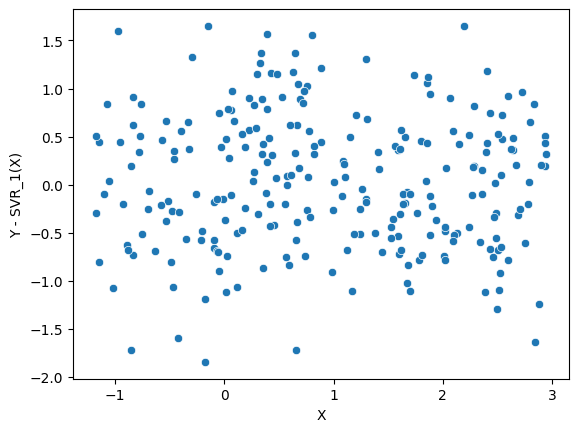

In [30]:
sns.scatterplot(x=X, y=residuals1)
plt.xlabel('X')
plt.ylabel('Y - SVR_1(X)')

Text(0, 0.5, 'X - SVR_2(Y)')

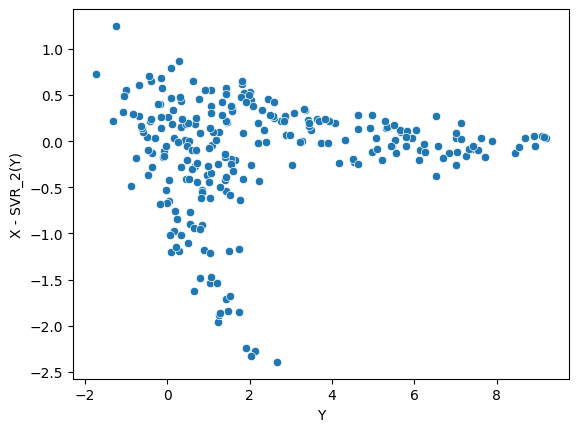

In [31]:
sns.scatterplot(x=Y, y=residuals2)
plt.xlabel('Y')
plt.ylabel('X - SVR_2(Y)')

In [23]:
testStat, thresh = hsic_gam(X.reshape(-1, 1), residuals1.reshape(-1, 1), alph = 0.05)
print(testStat, thresh)
if testStat > thresh:
    print('X and residuals1 are dependent')
else:
    print('X and residuals1 are independent')

0.4183358770791805 0.6231237574400426
X and residuals1 are independent


In [26]:
testStat, thresh = hsic_gam(Y.reshape(-1, 1), residuals2.reshape(-1, 1), alph = 0.05)
print(testStat, thresh)
if testStat > thresh:
    print('Y and residuals2 are dependent')
else:
    print('Y and residuals2 are independent')

3.8880208981241093 0.5366292272129034
Y and residuals2 are dependent
